In [2]:
import scipy.misc as misc
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_recall_curve
from scipy.ndimage.measurements import *
from skimage import measure
sys.path.append(os.path.realpath('../metrics'))
from eval_segm import *
from seg_metric import SegMetric

# All training images

/home/helios/anaconda3/envs/TF/lib/python3.5/site-packages/PIL/Image.py:2274: DecompressionBombWarning: Image size (117366062 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


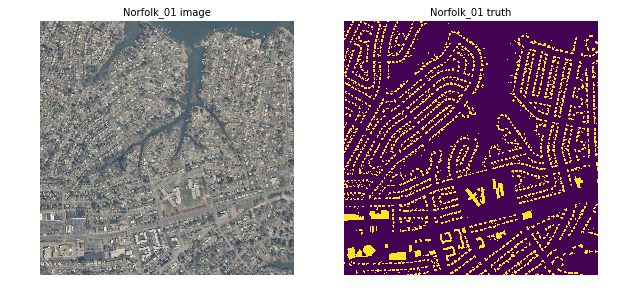

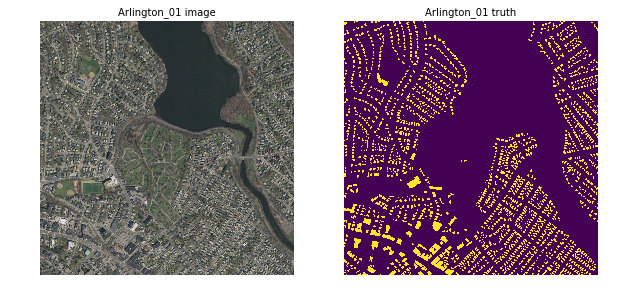

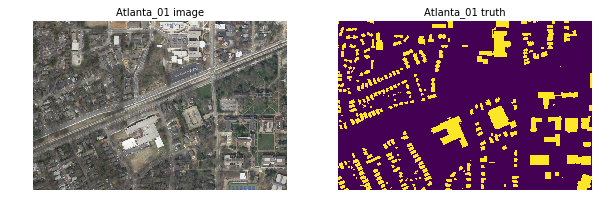

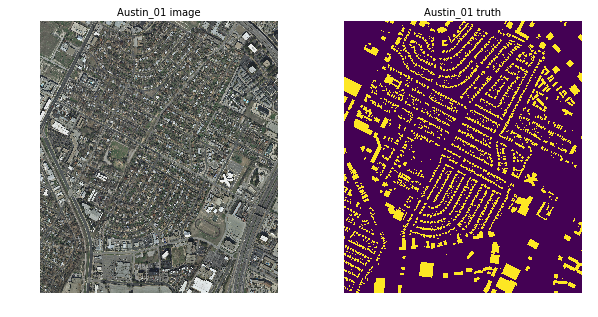

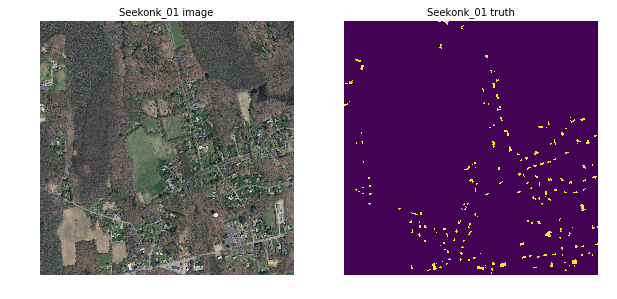

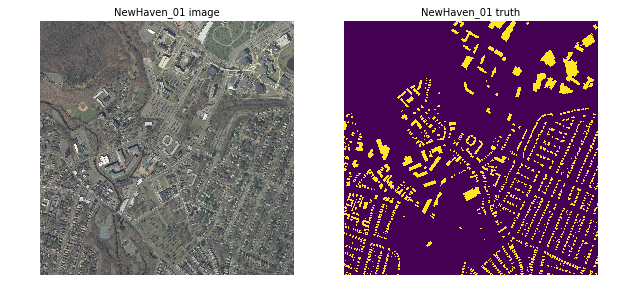

In [64]:
train_city_list = ['Norfolk', 'Arlington', 'Atlanta', 'Austin', 'Seekonk', 'NewHaven']
for train_city_name in train_city_list:
    IMAGE_PATH = os.path.expanduser("~/Documents/data/building/{}".format(train_city_name))
    train_image_file = '{}_01'.format(train_city_name)
    train_image = misc.imresize(misc.imread(os.path.join(IMAGE_PATH, "{}_RGB.png".format(train_image_file))), 0.2)
    train_truth = misc.imresize((misc.imread(os.path.join(IMAGE_PATH, "{}_truth.png".format(train_image_file))) / 255).astype(np.uint8), 0.2)
    # plt.figure('Testing on {}'.format(test_image_file), figsize=(120, 10))
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(train_image)
    axes[0].set_title('{} image'.format(train_image_file), fontsize=10)
    axes[0].set_axis_off()

    axes[1].imshow(train_truth)
    axes[1].set_title('{} truth'.format(train_image_file), fontsize=10)
    axes[1].set_axis_off()

# Deep Lab

In [12]:
learning_rate = 1e-3
batch_size = 20
input_size = '128,128'
decay_step = 10 # in epochs
decay_rate = 0.1
IMAGE_SIZE = 128
weight_decay = 0.0005
ind=1 # training image index


/home/helios/anaconda3/envs/TF/lib/python3.5/site-packages/PIL/Image.py:2274: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/home/helios/anaconda3/envs/TF/lib/python3.5/site-packages/PIL/Image.py:2274: DecompressionBombWarning: Image size (96864964 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


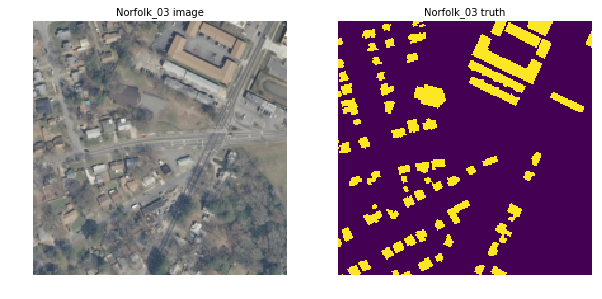

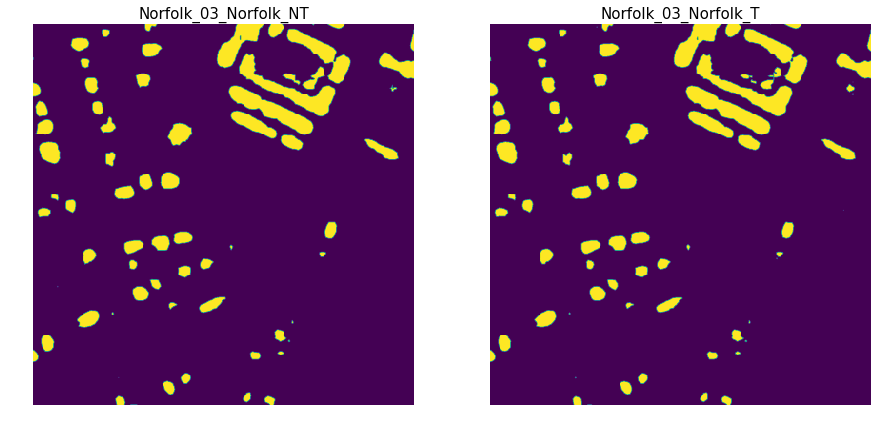

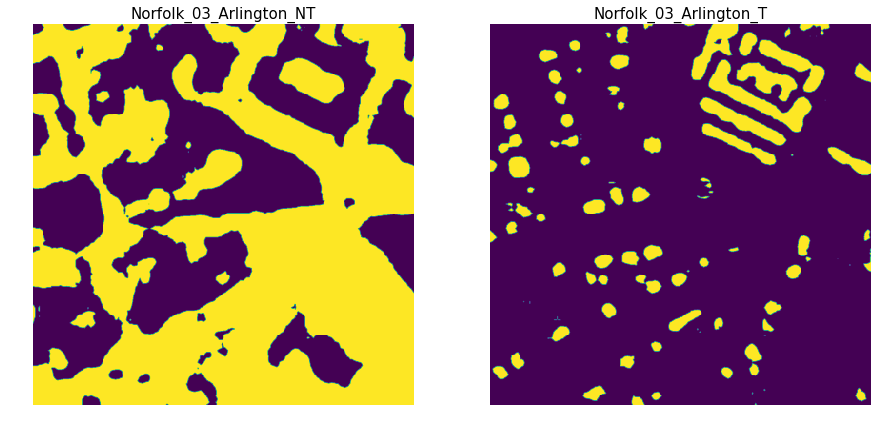

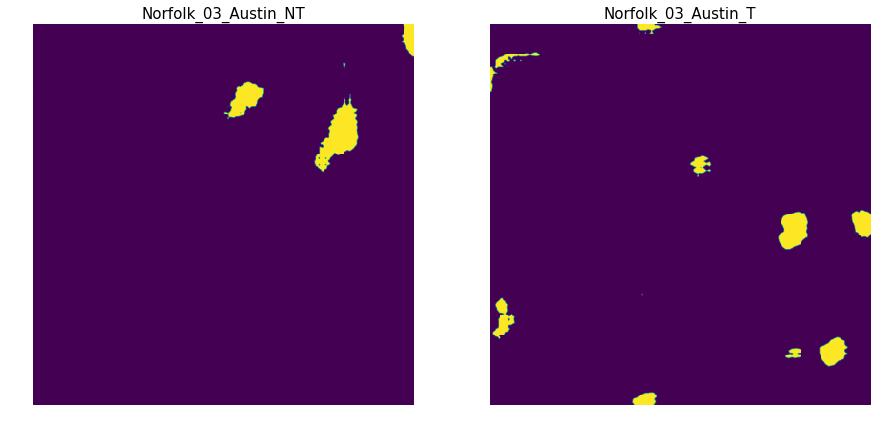

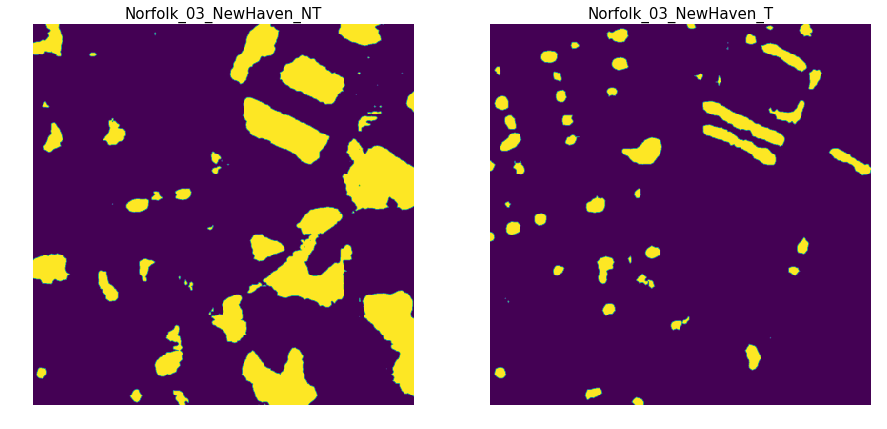

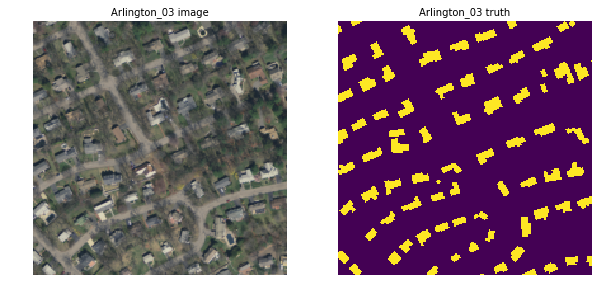

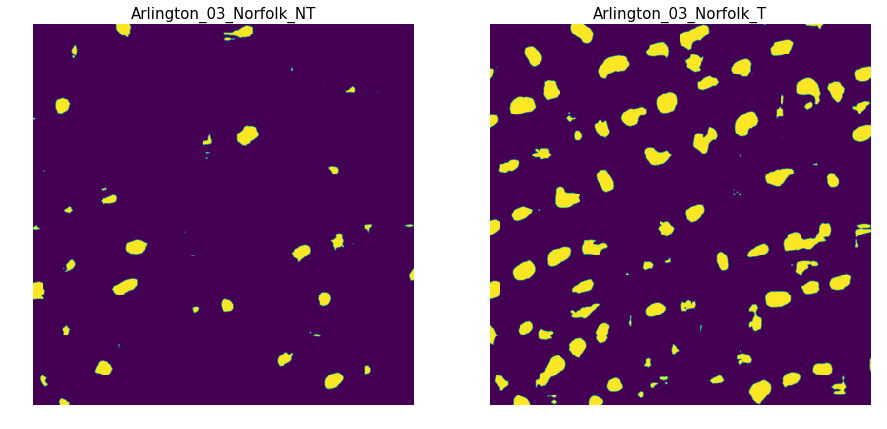

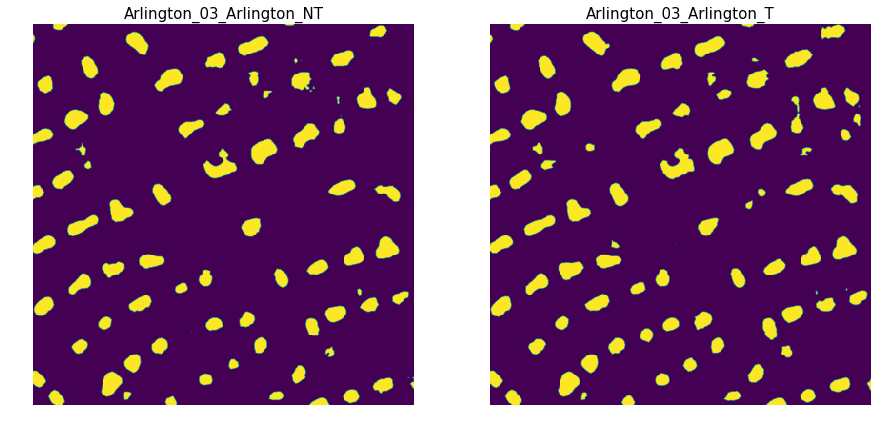

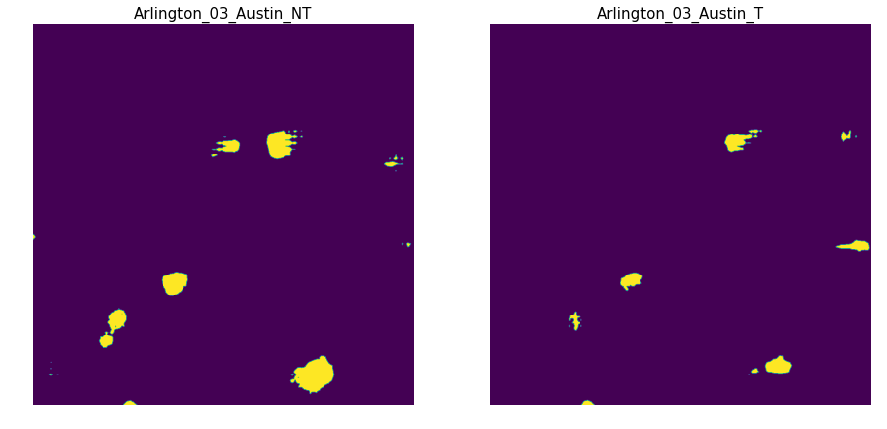

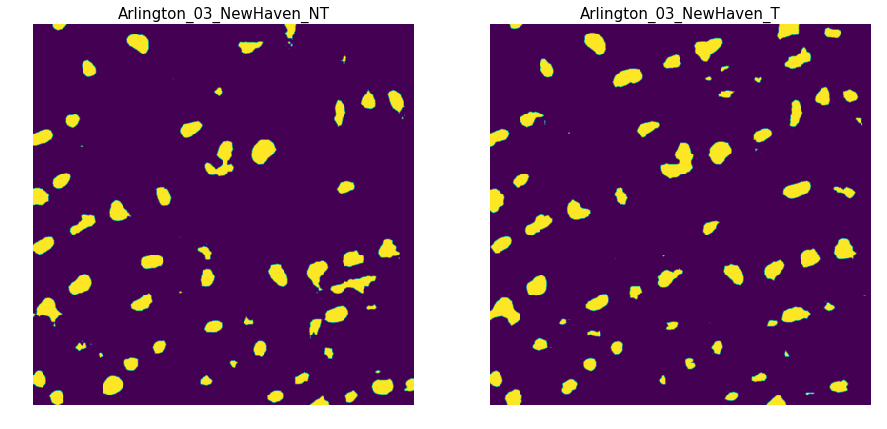

In [73]:
train_city_list = ['Norfolk', 'Arlington', 'Austin', 'NewHaven']
test_city_list = ['Norfolk', 'Arlington']
for test_city_name in test_city_list:
    IMAGE_PATH = os.path.expanduser("~/Documents/data/building/{}".format(test_city_name))
    test_image_file = '{}_{:0>2}'.format(test_city_name, 2 if test_city_name == 'NewHaven' else 3)
    test_image = misc.imresize(misc.imread(os.path.join(IMAGE_PATH, "{}_RGB.png".format(test_image_file)))[2000:3000,2000:3000,:], 0.2)
    test_truth = misc.imresize((misc.imread(os.path.join(IMAGE_PATH, "{}_truth.png".format(test_image_file)))[2000:3000,2000:3000] / 255).astype(np.uint8), 0.2)
    pred_NT = {}
    pred_T = {}
    # plt.figure('Testing on {}'.format(test_image_file), figsize=(120, 10))
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(test_image)
    axes[0].set_title('{} image'.format(test_image_file), fontsize=10)
    axes[0].set_axis_off()

    axes[1].imshow(test_truth)
    axes[1].set_title('{} truth'.format(test_image_file), fontsize=10)
    axes[1].set_axis_off()
    
    for i, train_city_name in enumerate(train_city_list):

        snapshot_path = os.path.expanduser("~/Documents/zhenlinx/code/tensorflow-deeplab-resnet/snapshots_building/train_with_pretrained_model/{}_{:0>2}_batchsize{}_learningRate_{:.0e}_L2weight_{}_decayStep_{:d}_decayRate{}".format(train_city_name, ind, batch_size, learning_rate, weight_decay, decay_step, decay_rate))

        image_path_NT = os.path.join(snapshot_path, 'images_NT')
        pred_NT[train_city_name] = misc.imresize(misc.imread(
            os.path.join(image_path_NT, '{}_valid_pred_255.png'.format(test_image_file)))[2000:3000,2000:3000], 0.4)
        
        f, axes = plt.subplots(1, 2, figsize=(15, 30))

        axes[0].imshow(pred_NT[train_city_name])
        axes[0].set_title('{}_{}_NT'.format(test_image_file, train_city_name), fontsize=15)
        axes[0].set_axis_off()
        
        image_path_T = os.path.join(snapshot_path, 'images')
        pred_T[train_city_name] = misc.imresize(misc.imread(
            os.path.join(image_path_T, '{}_valid_pred_255.png'.format(test_image_file)))[2000:3000,2000:3000], 0.4)

        axes[1].imshow(pred_T[train_city_name])
        axes[1].set_title('{}_{}_T'.format(test_image_file, train_city_name), fontsize=15)
        axes[1].set_axis_off()


# Unet_cross_entropy

In [4]:
learning_rate = 1e-3
batch_size = 20
input_size = '128,128'
IMAGE_SIZE = 128
decay_step = 1 # in epochs
decay_rate = 0.9
ind_training=1 # training image index

/home/helios/anaconda3/envs/TF/lib/python3.5/site-packages/PIL/Image.py:2274: DecompressionBombWarning: Image size (96864964 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


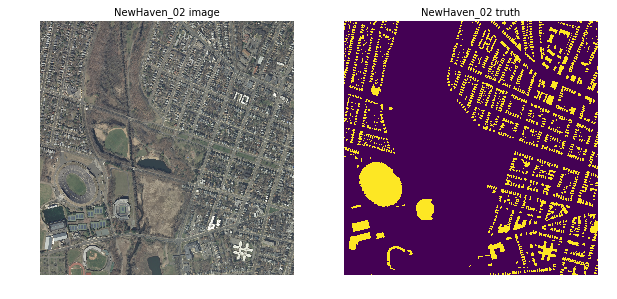

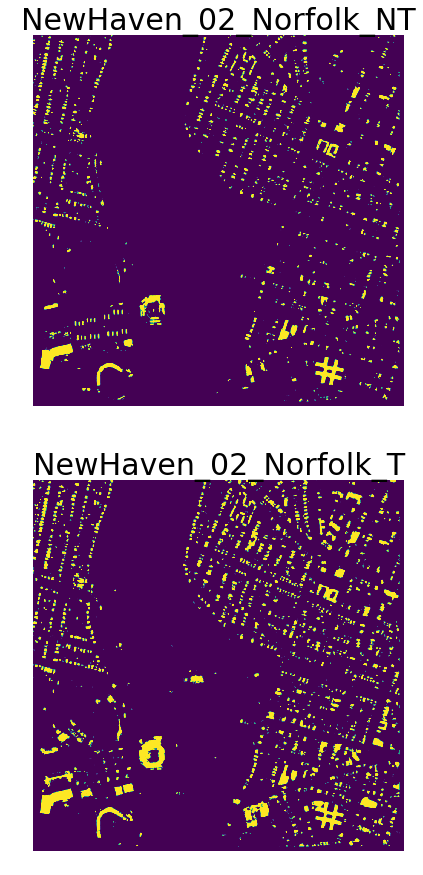

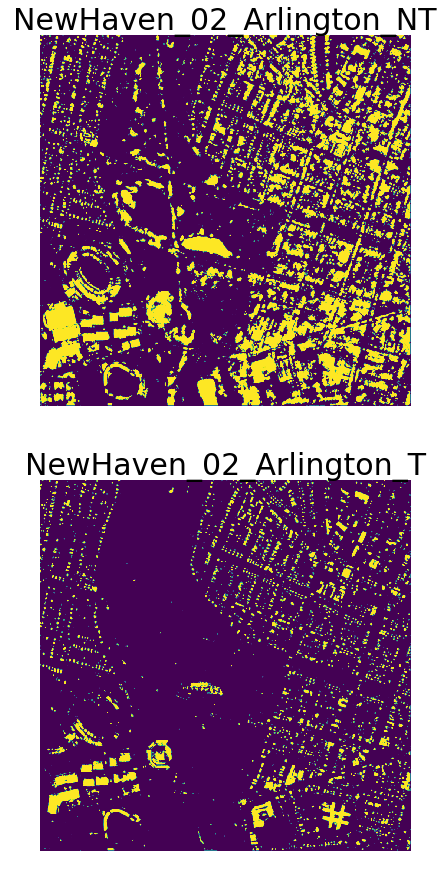

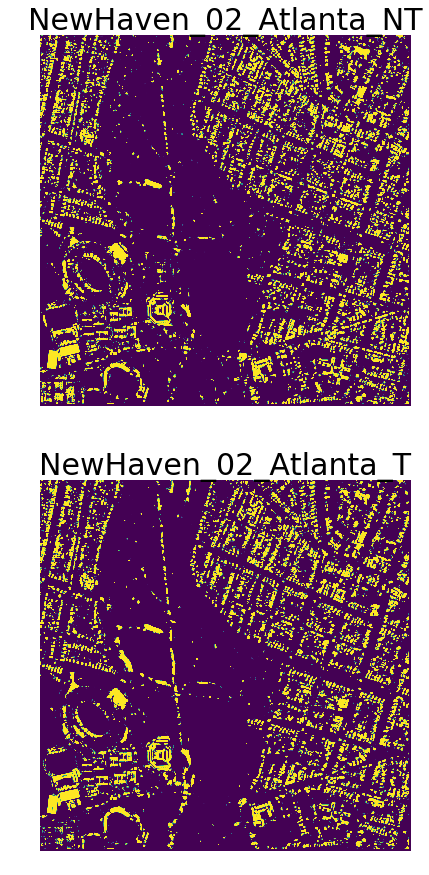

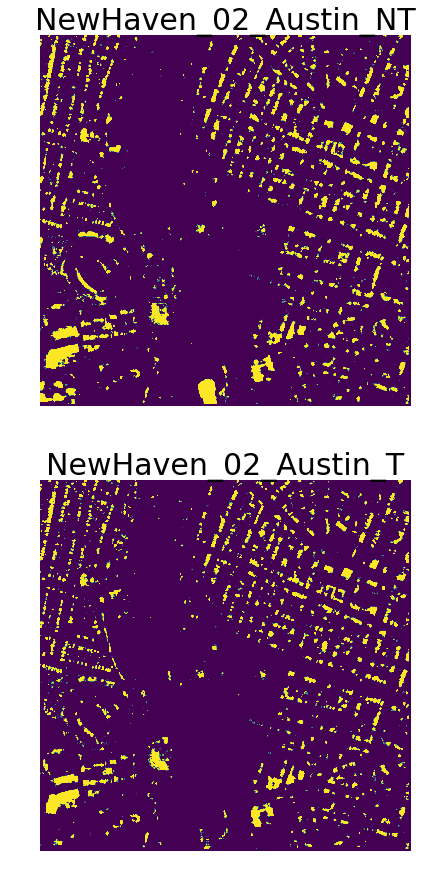

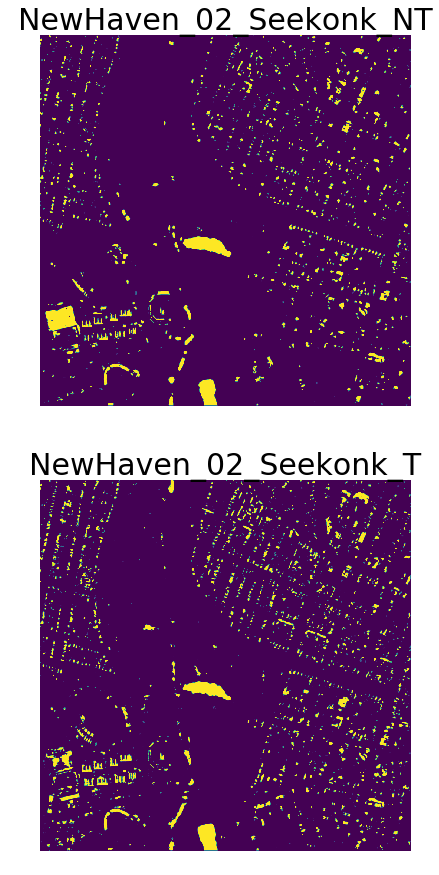

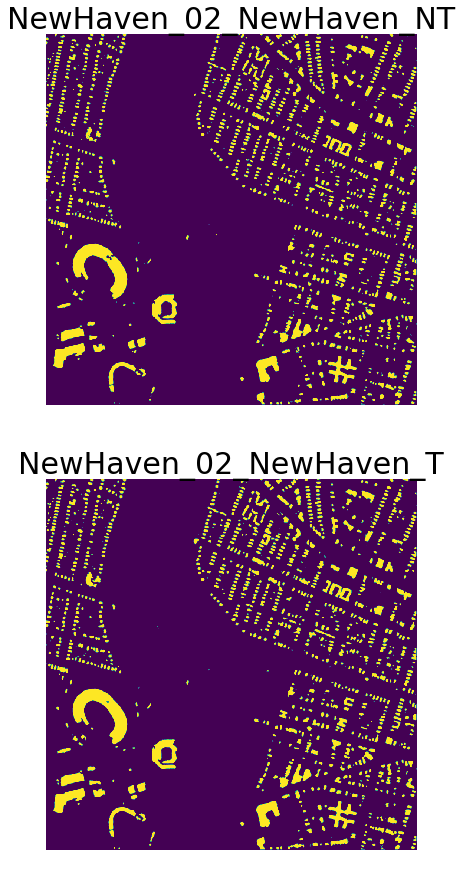

In [92]:
train_city_list = ['Norfolk', 'Arlington', 'Atlanta', 'Austin', 'Seekonk', 'NewHaven']
test_city_list = ['NewHaven']
num_train = train_city_list.__len__()
for test_city_name in test_city_list:
    IMAGE_PATH = os.path.expanduser("~/Documents/data/building/{}".format(test_city_name))
    test_image_file = '{}_{:0>2}'.format(test_city_name, 2 if test_city_name == 'NewHaven' else 3)
    test_image = misc.imresize(misc.imread(os.path.join(IMAGE_PATH, "{}_RGB.png".format(test_image_file))), 0.2)
    test_truth = misc.imresize((misc.imread(os.path.join(IMAGE_PATH, "{}_truth.png".format(test_image_file))) / 255).astype(np.uint8), 0.2)
    pred_NT = {}
    pred_T = {}
    # plt.figure('Testing on {}'.format(test_image_file), figsize=(120, 10))
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(test_image)
    axes[0].set_title('{} image'.format(test_image_file), fontsize=10)
    axes[0].set_axis_off()

    axes[1].imshow(test_truth)
    axes[1].set_title('{} truth'.format(test_image_file), fontsize=10)
    axes[1].set_axis_off()
    
    for i, train_city_name in enumerate(train_city_list):

        image_path = os.path.expanduser("~/Documents/zhenlinx/code/UNet-in-Tensorflow/snapshots_building/{}_{:0>2}_loss_entropy_batchsize{}_learningRate_{:.0e}_decayStep_{}_decayRate{}/images"
                                        .format(train_city_name, ind_training, batch_size, learning_rate, decay_step, decay_rate))

        pred_NT[train_city_name] = misc.imresize(misc.imread(
            os.path.join(image_path, '{}_NT_pred_threshold_0.5.png'.format(test_image_file))), 0.2)
        
        f, axes = plt.subplots(2, 1, figsize=(30, 15))

        axes[0].imshow(pred_NT[train_city_name])
        axes[0].set_title('{}_{}_NT'.format(test_image_file, train_city_name), fontsize=30)
        axes[0].set_axis_off()
        
        pred_T[train_city_name] = misc.imresize(misc.imread(
            os.path.join(image_path, '{}_pred_threshold_0.5.png'.format(test_image_file))), 0.2)

        axes[1].imshow(pred_T[train_city_name])
        axes[1].set_title('{}_{}_T'.format(test_image_file, train_city_name), fontsize=30)
        axes[1].set_axis_off()


In [11]:
sys.path.append(os.path.expanduser('~/Documents/zhenlinx/code/2017Summer/utils'))
from CORAL import image_adapt

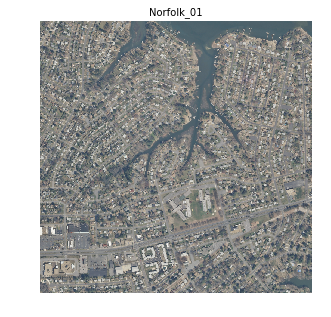

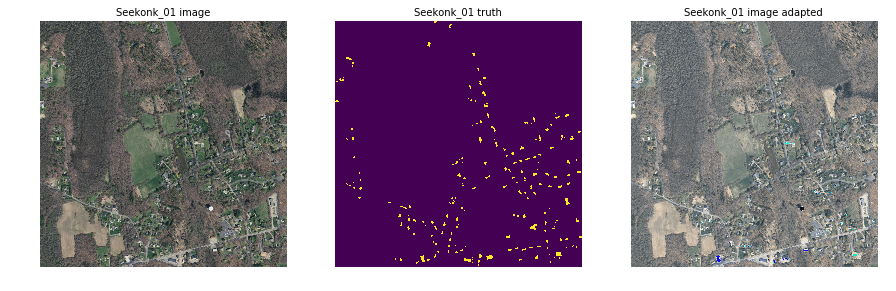

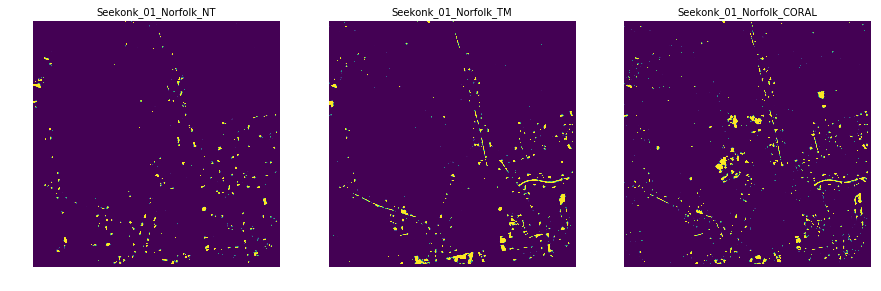

In [18]:
test_city_list = ['Seekonk']
train_city_list = ['Norfolk']
num_train = train_city_list.__len__()
IMAGE_PATH = os.path.expanduser("~/Documents/data/building/{}".format('Norfolk'))
train_image = misc.imresize(misc.imread(os.path.join(IMAGE_PATH, "{}_RGB.png".format('Norfolk_01'))), 0.2)
plt.figure(figsize=(5,5))
plt.imshow(train_image)
plt.axis('off')
plt.title('Norfolk_01',fontsize=10)
for test_city_name in test_city_list:
    IMAGE_PATH = os.path.expanduser("~/Documents/data/building/{}".format(test_city_name))
    test_image_file = '{}_{:0>2}'.format(test_city_name, 2 if test_city_name == 'NewHaven' else 1)
    test_image = misc.imresize(misc.imread(os.path.join(IMAGE_PATH, "{}_RGB.png".format(test_image_file))), 0.2)
    test_truth = misc.imresize((misc.imread(os.path.join(IMAGE_PATH, "{}_truth.png".format(test_image_file))) / 255).astype(np.uint8), 0.2)
    
    IMAGE_PATH = os.path.expanduser("~/Documents/data/building/{}".format(test_city_name))
    test_adapted = image_adapt(test_image, train_image, 1)

    pred_NT = {}
    pred_TM = {}
    pred_CORAL = {}
    # plt.figure('Testing on {}'.format(test_image_file), figsize=(120, 10))
    f, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(test_image)
    axes[0].set_title('{} image'.format(test_image_file), fontsize=10)
    axes[0].set_axis_off()

    axes[1].imshow(test_truth)
    axes[1].set_title('{} truth'.format(test_image_file), fontsize=10)
    axes[1].set_axis_off()
    
    axes[2].imshow(test_adapted)
    axes[2].set_title('{} image adapted'.format(test_image_file), fontsize=10)
    axes[2].set_axis_off()
    
    for i, train_city_name in enumerate(train_city_list):

        image_path = os.path.expanduser("~/Documents/zhenlinx/code/UNet-in-Tensorflow/snapshots_building/{}_{:0>2}_loss_entropy_batchsize{}_learningRate_{:.0e}_decayStep_{}_decayRate{}/images"
                                        .format(train_city_name, ind_training, batch_size, learning_rate, decay_step, decay_rate))

        pred_NT[train_city_name] = misc.imresize(misc.imread(
            os.path.join(image_path, '{}_NT_pred_threshold_0.5.png'.format(test_image_file))), 0.2)
        
        f, axes = plt.subplots(1, 3, figsize=(15, 30))

        axes[0].imshow(pred_NT[train_city_name])
        axes[0].set_title('{}_{}_NT'.format(test_image_file, train_city_name), fontsize=10)
        axes[0].set_axis_off()
        
        pred_TM[train_city_name] = misc.imresize(misc.imread(
            os.path.join(image_path, '{}_pred_threshold_0.5.png'.format(test_image_file))), 0.2)

        axes[1].imshow(pred_TM[train_city_name])
        axes[1].set_title('{}_{}_TM'.format(test_image_file, train_city_name), fontsize=10)
        axes[1].set_axis_off()
        
        pred_CORAL[train_city_name] = misc.imresize(misc.imread(
            os.path.join(image_path, '{}_CORALpred_threshold_0.5.png'.format(test_image_file))), 0.2)

        axes[2].imshow(pred_CORAL[train_city_name])
        axes[2].set_title('{}_{}_CORAL'.format(test_image_file, train_city_name), fontsize=10)
        axes[2].set_axis_off()
        